 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



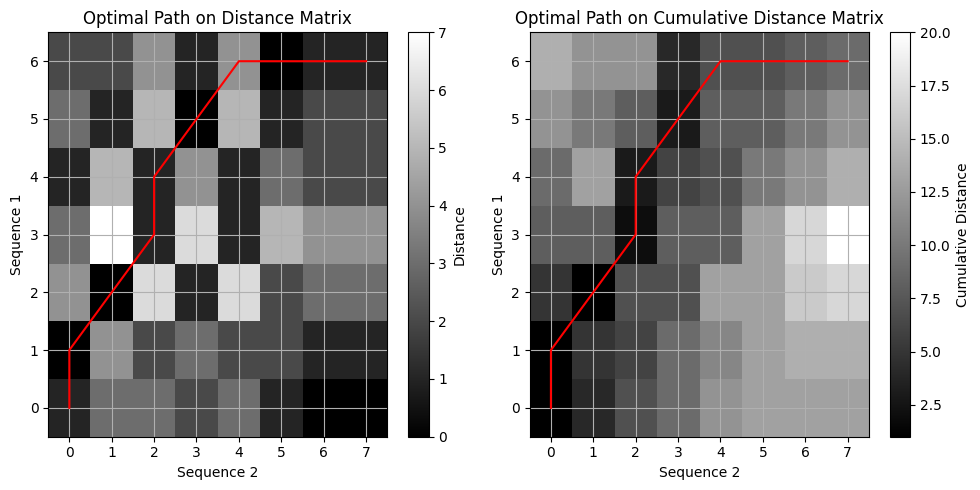

Distance Matrix:
[[2. 2. 4. 1. 4. 0. 1. 1.]
 [3. 1. 5. 0. 5. 1. 2. 2.]
 [1. 5. 1. 4. 1. 3. 2. 2.]
 [3. 7. 1. 6. 1. 5. 4. 4.]
 [4. 0. 6. 1. 6. 2. 3. 3.]
 [0. 4. 2. 3. 2. 2. 1. 1.]
 [1. 3. 3. 2. 3. 1. 0. 0.]]
Cumulative Distance Matrix:
[[14. 12. 12.  4.  7.  7.  8.  9.]
 [12. 10.  8.  3.  8.  8. 10. 12.]
 [ 9. 13.  3.  6.  7. 10. 12. 14.]
 [ 8.  8.  2.  8.  8. 13. 17. 20.]
 [ 5.  1.  7.  7. 13. 13. 16. 17.]
 [ 1.  5.  6.  9. 11. 13. 14. 14.]
 [ 1.  4.  7.  9. 12. 13. 13. 13.]]
Optimal Path: [(0, 0), (1, 0), (2, 1), (3, 2), (4, 2), (5, 3), (6, 4), (6, 5), (6, 6), (6, 7)]
Optimal Distance: 9


In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((len(sequence1), len(sequence2)))   #Cummulative distance matrix
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            current_distance = abs(sequence1[i] - sequence2[j])     #Compute the distance between the two points
            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
            if i == 0 and j == 0:
                DTW_cumulate_Matrix[i, j] = current_distance
            elif i == 0:
                DTW_cumulate_Matrix[i, j] = current_distance + DTW_cumulate_Matrix[i, j - 1]
            elif j == 0:
                DTW_cumulate_Matrix[i, j] = current_distance + DTW_cumulate_Matrix[i - 1, j]
            else:
                DTW_cumulate_Matrix[i, j] = current_distance + min(DTW_cumulate_Matrix[i - 1, j],
                                                                   DTW_cumulate_Matrix[i - 1, j - 1],
                                                                   DTW_cumulate_Matrix[i, j - 1])

    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    i = len(sequence1) - 1 # length of the sequence1
    j = len(sequence2) - 1 # length of the sequence2
    opt_distance = abs(sequence1[i] - sequence2[j])
    optimal_path = [(i, j)]
    while (i!=0 or j!=0): #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        if i==0:
            j -= 1
        elif j==0:
            i -= 1
        else:
            min_index = np.argmin([DTW_cumulate_Matrix[i - 1, j],
                                  DTW_cumulate_Matrix[i - 1, j - 1],
                                  DTW_cumulate_Matrix[i, j - 1]])
            if min_index == 0:
                i -= 1
            elif min_index == 1:
                i -= 1
                j -= 1
            else:
                j -= 1

        # Add the current indexes distance
        opt_distance = opt_distance + abs(sequence1[i] - sequence2[j])   #Compute the distance between the points sequence1[i] and sequence2[j]
        #Store the required indexes to obtain the optimal path
        optimal_path.append((i, j))

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return opt_distance, optimal_path[::-1], DTW_cumulate_Matrix

def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates
    distance_matrix = np.zeros((len(sequence1), len(sequence2)))
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            distance_matrix[i, j] = abs(sequence1[i] - sequence2[j])

    #Obtain the optimal path using "DTW" function
    opt_distance, optimal_path, DTW_cumulate_Matrix = DTW(sequence1, sequence2)

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(distance_matrix, origin='lower', cmap='gray', aspect='auto')
    plt.plot([y for x, y in optimal_path], [x for x, y in optimal_path], color='red')
    plt.title('Optimal Path on Distance Matrix')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    plt.colorbar(label='Distance')
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.imshow(DTW_cumulate_Matrix, origin='lower', cmap='gray', aspect='auto')
    plt.plot([y for x, y in optimal_path], [x for x, y in optimal_path], color='red')
    plt.title('Optimal Path on Cumulative Distance Matrix')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    plt.colorbar(label='Cumulative Distance')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("Distance Matrix:")
    print(distance_matrix[::-1,:])
    print("Cumulative Distance Matrix:")
    print(DTW_cumulate_Matrix[::-1,:])
    print(f'Optimal Path: {optimal_path}\nOptimal Distance: {opt_distance}')

# Test the implemented DTW algorithm
sequence1 = [4, 3, 7, 0, 2, 6, 5]
sequence2 = [3, 7, 1, 6, 1, 5, 4, 4]
plotDTWpath(sequence1, sequence2)

<b> Report your observations </b>

1. <b>DTW Algorithm Implementation:</b>
* Implemented Dynamic Time Warping (DTW) algorithm for sequence comparison.
* Handles sequences with varying lengths and non-linear alignments.

2. <b>Visualization and Verification:</b>
* Utilized matplotlib for visual representation.
* Plotted optimal path on distance and cumulative matrices.

3. <b>Observations:</b>
* <b>Distance Matrix:</b>
Represents pairwise Euclidean distances between sequence elements.
* <b>Cumulative Distance Matrix:</b>
Illustrates accumulated distances along different alignment paths.
* <b>Optimal Path:</b>
Traverses through cumulative matrix, aligning sequence elements.

4. <b>Optimal Distance Calculation:</b>
* Quantifies similarity between sequences.
* Sum of distances along optimal path.

Overall, DTW algorithm effectively compares sequences with varying lengths and non-linear alignments, providing valuable insights into their similarity.


<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
# if want to record new audio uncomment it and record it
'''from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio
from google.colab import drive
import shutil
from time import sleep

# Mount Google Drive
drive.mount('/content/drive')

files = ['train_zero.wav','train_one.wav','train_two.wav','train_three.wav','train_four.wav',
              'train_five.wav', 'train_six.wav', 'train_seven.wav', 'train_eight.wav', 'train_nine.wav',
              'test_zero1.wav', 'test_zero2.wav', 'test_zero3.wav',
              'test_one1.wav', 'test_one2.wav', 'test_one3.wav',
              'test_two1.wav', 'test_two2.wav', 'test_two3.wav',
              'test_three1.wav', 'test_three2.wav', 'test_three3.wav',
              'test_four1.wav', 'test_four2.wav', 'test_four3.wav',
              'test_five1.wav', 'test_five2.wav', 'test_five3.wav',
              'test_six1.wav', 'test_six2.wav', 'test_six3.wav',
              'test_seven1.wav', 'test_seven2.wav', 'test_seven3.wav',
              'test_eight1.wav', 'test_eight2.wav', 'test_eight3.wav',
              'test_nine1.wav', 'test_nine2.wav', 'test_nine3.wav']

# Specify the path to save the audio file in Google Drive
destination_path = "/content/drive/My Drive/PRML_Assignments/MultiSpeakerDigitData_modified/Audio_files"
#### You can run this module in the loop to record more repetitions of the digits.
for i in range(40):
    if os.path.isfile('reco.wav'):
        print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
    else:
        print("Recording:", files[i])
        print("Recording the digits")
        wav = record(2.0) #It will record three seconds of your speech. You can change the duration.
        wav = wav.set_frame_rate(16000)
        sig=wav.get_array_of_samples()
        samples=np.array(sig).T.astype(np.float32)
        fp_arr = np.array(samples).T.astype(np.float32)
        fp_arr /= np.iinfo(sig.typecode).max
        scipy.io.wavfile.write(files[i], 16000, fp_arr) #Please change the name.

    wn = Audio(files[i], autoplay=True)
    display(wn)
    # Move the recorded audio file to the destination path in Google Drive
    shutil.move(files[i], destination_path)
    sleep(5)'''

'from matplotlib import pyplot as plt\nimport numpy as np\nimport scipy.io.wavfile\nimport io\nimport os\nfrom IPython.display import Audio\nfrom google.colab import drive\nimport shutil\nfrom time import sleep\n\n# Mount Google Drive\ndrive.mount(\'/content/drive\')\n\nfiles = [\'train_zero.wav\',\'train_one.wav\',\'train_two.wav\',\'train_three.wav\',\'train_four.wav\',\n              \'train_five.wav\', \'train_six.wav\', \'train_seven.wav\', \'train_eight.wav\', \'train_nine.wav\',\n              \'test_zero1.wav\', \'test_zero2.wav\', \'test_zero3.wav\',\n              \'test_one1.wav\', \'test_one2.wav\', \'test_one3.wav\',\n              \'test_two1.wav\', \'test_two2.wav\', \'test_two3.wav\',\n              \'test_three1.wav\', \'test_three2.wav\', \'test_three3.wav\',\n              \'test_four1.wav\', \'test_four2.wav\', \'test_four3.wav\',\n              \'test_five1.wav\', \'test_five2.wav\', \'test_five3.wav\',\n              \'test_six1.wav\', \'test_six2.wav\', \'test_si

In [ ]:
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy
from google.colab import drive
import os
import shutil

#Load the dataset
drive.mount('/content/drive',force_remount=True)
directory_path = "/content/drive/My Drive/PRML_Assignments/MultiSpeakerDigitData_modified/Audio_files"
file_names = os.listdir(directory_path)

# Iterate over the file names and copy each file to the current directory
for file_name in file_names:
    source_file_path = os.path.join(directory_path, file_name)
    shutil.copy(source_file_path, "./")  # Copy the file to the current directory

Mounted at /content/drive


**Algorithm to perform isolated digit recognition**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def vectorDTW(template1,template2):
    #######################################################
    # Input  : Two templates
    # Output : DTW path and optimal distance
    #######################################################
    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################

    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((len(template1), len(template2)))   # cummulative distance matrix
    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(len(template1)): #you can start from 1
        for j in range(len(template2)):
            current_distance = np.linalg.norm(template1[i] - template2[j])     # Compute the euclidean distance between the current feature vectors
            #print(current_distance)
            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
            if i == 0 and j == 0:
                DTW_cumulate_Matrix[i, j] = current_distance
            elif i == 0:
                DTW_cumulate_Matrix[i, j] = current_distance + DTW_cumulate_Matrix[i, j - 1]
            elif j == 0:
                DTW_cumulate_Matrix[i, j] = current_distance + DTW_cumulate_Matrix[i - 1, j]
            else:
                DTW_cumulate_Matrix[i, j] = current_distance + min(DTW_cumulate_Matrix[i - 1, j],
                                                                   DTW_cumulate_Matrix[i - 1, j - 1],
                                                                   DTW_cumulate_Matrix[i, j - 1])

    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    i = len(template1) - 1 # length of the template1
    j = len(template2) - 1 # length of the template2
    opt_distance = np.linalg.norm(template1[i] - template2[j])
    optimal_path = [(i, j)]
    while (i!=0 or j!=0): #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        if i==0:
            j -= 1
        elif j==0:
            i -= 1
        else:
            min_index = np.argmin([DTW_cumulate_Matrix[i - 1, j],
                                  DTW_cumulate_Matrix[i - 1, j - 1],
                                  DTW_cumulate_Matrix[i, j - 1]])
            if min_index == 0:
                i -= 1
            elif min_index == 1:
                i -= 1
                j -= 1
            else:
                j -= 1
        # Add the current indexes distance
        opt_distance = opt_distance + np.linalg.norm(template1[i] - template2[j])   #Compute the distance between the points template1[i] and template2[j]
        #Store the required indexes to obtain the optimal path
        optimal_path.append((i, j))

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    #print(f'Optimal Distance: {opt_distance}')
    return opt_distance, optimal_path[::-1], DTW_cumulate_Matrix

def plotDTWpath_vector(template1,template2):
    #######################################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates
    distance_matrix = np.zeros((len(template1), len(template2)))
    for i in range(len(template1)):
        for j in range(len(template2)):
            distance_matrix[i, j] = np.linalg.norm(template1[i] - template2[j])

    #Obtain the optimal path using "DTW" function
    opt_distance, optimal_path, DTW_cumulate_Matrix = vectorDTW(template1, template2)
    print(f'Optimal Distance: {opt_distance}')

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(distance_matrix, origin='lower', cmap='gray', aspect='auto')
    plt.plot([y for x, y in optimal_path], [x for x, y in optimal_path], color='red')
    plt.title('Optimal Path on Distance Matrix')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    plt.colorbar(label='Distance')
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.imshow(DTW_cumulate_Matrix, origin='lower', cmap='gray', aspect='auto')
    plt.plot([y for x, y in optimal_path], [x for x, y in optimal_path], color='red')
    plt.title('Optimal Path on Cumulative Distance Matrix')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    plt.colorbar(label='Cumulative Distance')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    #print("Distance Matrix:")
    #print(distance_matrix[::-1,:])
    #print("Cumulative Distance Matrix:")
    #print(DTW_cumulate_Matrix[::-1,:])
    #print(f'Optimal Path: {optimal_path}\nOptimal Distance: {opt_distance}')


**Plot the optimal DTW path**

(197, 13) (197, 13)
Training 1 with Testing 1
Optimal Distance: 10832.8330078125


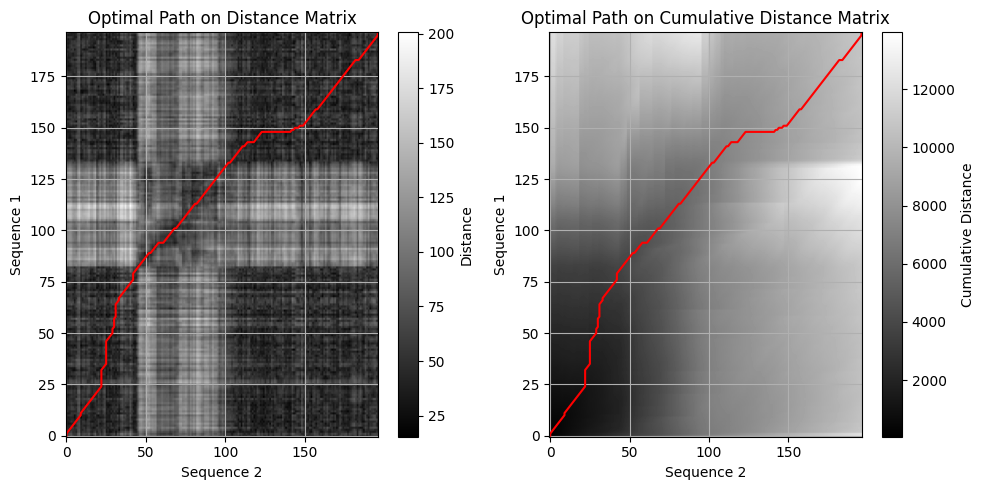

Training 1 with Testing 2
Optimal Distance: 13209.796875


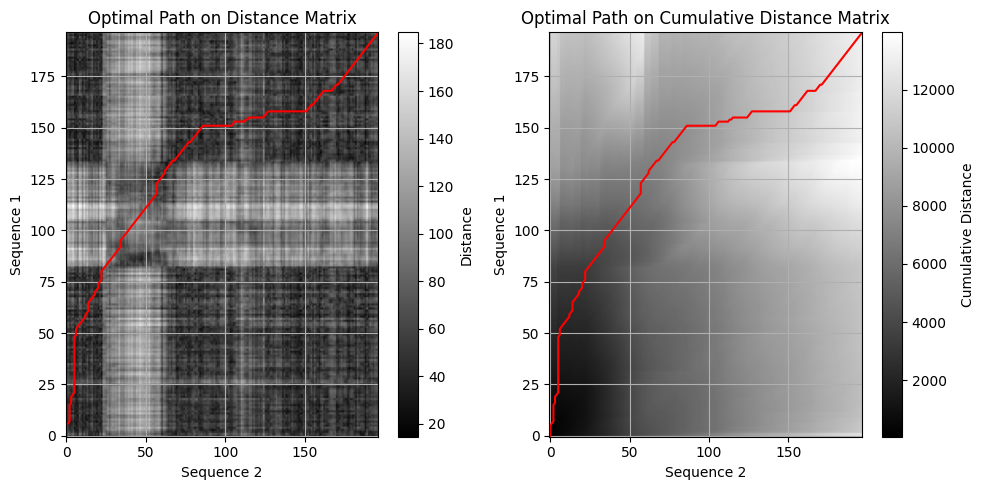

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
(rate,sig) = wav.read('train_one.wav')
sig=sig-np.mean(sig)
mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
template1 =speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
(rate,sig) = wav.read('test_one1.wav')
sig=sig-np.mean(sig)
mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
template2 =speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
(rate,sig) = wav.read('test_two1.wav')
sig=sig-np.mean(sig)
mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
template3 =speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
#print(template1,template2)
print(template1.shape,template2.shape)
#print(len(template1))
print("Training 1 with Testing 1")
plotDTWpath_vector(template1,template2)
print("Training 1 with Testing 2")
plotDTWpath_vector(template1,template3)

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
train_files = ['train_zero.wav','train_one.wav','train_two.wav','train_three.wav','train_four.wav',
               'train_five.wav', 'train_six.wav', 'train_seven.wav', 'train_eight.wav', 'train_nine.wav']
test_files = ['test_zero1.wav', 'test_zero2.wav', 'test_zero3.wav',
              'test_one1.wav', 'test_one2.wav', 'test_one3.wav',
              'test_two1.wav', 'test_two2.wav', 'test_two3.wav',
              'test_three1.wav', 'test_three2.wav', 'test_three3.wav',
              'test_four1.wav', 'test_four2.wav', 'test_four3.wav',
              'test_five1.wav', 'test_five2.wav', 'test_five3.wav',
              'test_six1.wav', 'test_six2.wav', 'test_six3.wav',
              'test_seven1.wav', 'test_seven2.wav', 'test_seven3.wav',
              'test_eight1.wav', 'test_eight2.wav', 'test_eight3.wav',
              'test_nine1.wav', 'test_nine2.wav', 'test_nine3.wav']
ground_truth = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9]
conf_matrix = np.zeros((10,10))
train_template = []
for i in range(len(train_files)):
    (rate,sig) = wav.read(train_files[i])
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    train_template.append(speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False))
for j in range(len(test_files)):
    (rate,sig) = wav.read(test_files[j])
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    sample_template =speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    dis = []
    for i in range(len(train_files)):
        opt_dis,_,_ = vectorDTW(sample_template, train_template[i])
        dis.append(opt_dis)
    closest_match_index = np.argmin(dis)
    answer = closest_match_index
    print(f"The closest match for {test_files[j]} is {train_files[answer]}")
    conf_matrix[ground_truth[j]][answer] += 1

print(f'Confusion matrix generated is:\n{conf_matrix}')
# Calculate accuracy
sum = 0
for k in range(10):
    sum += conf_matrix[k][k]
    print(f'The accuracy of digit {k} is {(conf_matrix[k][k]/np.sum(conf_matrix[k]))*100}')
print(f'The overall accuracy is {(sum/np.sum(conf_matrix))*100}')

The closest match for test_zero1.wav is train_zero.wav
The closest match for test_zero2.wav is train_zero.wav
The closest match for test_zero3.wav is train_zero.wav
The closest match for test_one1.wav is train_nine.wav
The closest match for test_one2.wav is train_one.wav
The closest match for test_one3.wav is train_one.wav
The closest match for test_two1.wav is train_two.wav
The closest match for test_two2.wav is train_two.wav
The closest match for test_two3.wav is train_two.wav
The closest match for test_three1.wav is train_three.wav
The closest match for test_three2.wav is train_three.wav
The closest match for test_three3.wav is train_three.wav
The closest match for test_four1.wav is train_four.wav
The closest match for test_four2.wav is train_four.wav
The closest match for test_four3.wav is train_four.wav
The closest match for test_five1.wav is train_five.wav
The closest match for test_five2.wav is train_five.wav
The closest match for test_five3.wav is train_five.wav
The closest mat

<b> Report your observations </b>

1. <b>DTW Algorithm Integration:</b>
* Successfully integrated the DTW algorithm for isolated digit recognition.
* Used the Mel Frequency Cepstral Coefficients (MFCCs) as templates for speech signals.

2. <b>Testing and Evaluation:</b>
* Recorded isolated repetitions of digits for both training and testing data.
* Recorded training and testing data were tried to be as same as possible.
* Applied DTW to match test samples with training templates.

3. <b>Optimal Path Visualization:</b>
Plotted optimal DTW path on distance and cumulative distance matrices for two scenarios:
* Matching repetitions of the same digit.
* Matching different digits.

4. <b>Recognition Accuracy:</b>
* Evaluated the recognition accuracy by comparing test samples with ground truth.
* Calculated the percentage of correctly recognized trials for each digit i.e. overall accuracy.

5. <b>Confusion Matrix Analysis:</b>
* Generated a confusion matrix to analyze misclassifications.
* Identified the most confusing digits based on off-diagonal entries.
* 1 was confused as 9 once and 9 was confused as 6 once according to the recorded samples.

6. <b>Accuracy Insights:</b>
* Overall recognition accuracy achieved was approximately 93.33%.
* Some digits achieved perfect recognition, while others had lower accuracy due to confusion with similar digits (1,6,9).

7. <b>Performance Comparison:</b>
* Observed variations in recognition accuracy among different digits.
* Analyzed the impact of template variability and noise on recognition performance.


<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
from google.colab import drive
import os

#Load the dataset
drive.mount('/content/drive',force_remount=True)
directory_path = "/content/drive/My Drive/PRML_Assignments/MultiSpeakerDigitData_modified/MultiSpeakerDigitData_modified"

folders = os.listdir(directory_path)
print(folders)
file_lists = []
data_lists = []
for folder in folders:
    # Construct the full path to the folder
    folder_path = os.path.join(directory_path, folder)
    # List all files in the folder
    files = os.listdir(folder_path)
    print(files)
    # Store the list of file names
    file_lists.append(files)
    data = []
    for file in files:
        file_path = os.path.join(folder_path, file)
        (rate,sig) = wav.read(file_path)
        sig=sig-np.mean(sig)
        mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
        data.append(speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False))
    data_lists.append(data)

Mounted at /content/drive
['yweweler', 'nicolas', 'jackson', 'theo']
['9_yweweler_21.wav', '9_yweweler_7.wav', '9_yweweler_2.wav', '9_yweweler_13.wav', '9_yweweler_41.wav', '9_yweweler_15.wav', '9_yweweler_6.wav', '9_yweweler_44.wav', '9_yweweler_35.wav', '9_yweweler_11.wav', '9_yweweler_40.wav', '9_yweweler_24.wav', '9_yweweler_1.wav', '9_yweweler_19.wav', '9_yweweler_14.wav', '9_yweweler_43.wav', '9_yweweler_34.wav', '9_yweweler_16.wav', '9_yweweler_46.wav', '9_yweweler_12.wav', '9_yweweler_4.wav', '9_yweweler_32.wav', '9_yweweler_26.wav', '9_yweweler_36.wav', '9_yweweler_29.wav', '9_yweweler_48.wav', '9_yweweler_31.wav', '9_yweweler_20.wav', '9_yweweler_42.wav', '9_yweweler_47.wav', '9_yweweler_45.wav', '9_yweweler_30.wav', '9_yweweler_37.wav', '9_yweweler_39.wav', '9_yweweler_33.wav', '9_yweweler_25.wav', '5_yweweler_14.wav', '9_yweweler_18.wav', '9_yweweler_28.wav', '2_yweweler_17.wav', '4_yweweler_1.wav', '0_yweweler_47.wav', '2_yweweler_7.wav', '3_yweweler_30.wav', '6_yweweler_7

In [ ]:
def evaluate_performance_mine(train_files,test_files, train_files_name, test_files_name, train_truth):
    confusion_matrix = np.zeros((10,10))
    for j in range(len(test_files)):
        dis = []
        for i in range(len(train_files)):
            opt_dis,_,_ = vectorDTW(test_files[j], train_files[i])
            dis.append(opt_dis)
        closest_match_index = np.argmin(dis)
        #print(f"The closest match for {test_files_name[j]} is {train_files_name[closest_match_index]}")
        ground_truth = int(test_files_name[j][0])
        answer = int(train_truth[closest_match_index])
        confusion_matrix[ground_truth][answer] += 1
    return confusion_matrix

#Performance evaluation of Isolated digit recognition system on TDIGITS data
overall_conf_matrix = np.zeros((10,10))
train_files_name = ['train_zero.wav','train_one.wav','train_two.wav','train_three.wav','train_four.wav',
               'train_five.wav', 'train_six.wav', 'train_seven.wav', 'train_eight.wav', 'train_nine.wav']
train_truth = [0,1,2,3,4,5,6,7,8,9]
train_files = []
for i in range(len(train_files_name)):
    (rate,sig) = wav.read(train_files_name[i])
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    train_files.append(speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False))
for j in range(len(folders)):
    print(f'Working on {folders[j]} folder')
    files_name = file_lists[j]
    data = data_lists[j]
    ref = np.zeros(10)
    test_files = []
    test_files_name = []
    # creating 15 test files for each digit to reduce time taken to execute
    for i in range(len(files_name)):
        if np.sum(ref) == 150:
            break
        elif ref[int(files_name[i][0])] < 15:
            test_files_name.append(files_name[i])
            test_files.append(data[i])
            ref[int(files_name[i][0])] += 1
    print(f'Test signal sets created from {folders[j]}')
    conf_matrix = evaluate_performance_mine(train_files,test_files, train_files_name, test_files_name, train_truth)
    overall_conf_matrix += conf_matrix
    print(f'The confusion matrix when reference and test signal coming from {folders[j]} speaker is\n{conf_matrix}')
    sum = 0
    for k in range(10):
        sum += conf_matrix[k][k]
        print(f'The accuracy of digit {k} is {(conf_matrix[k][k]/np.sum(conf_matrix[k]))*100}')
    print(f'The overall accuracy is {(sum/np.sum(conf_matrix))*100}')
print(f'Overall combined confusion matrix is given by:\n{overall_conf_matrix}')
sum = 0
for k in range(10):
    sum += overall_conf_matrix[k][k]
    print(f'The accuracy of digit {k} is {(overall_conf_matrix[k][k]/np.sum(overall_conf_matrix[k]))*100}')
print(f'The overall accuracy is {(sum/np.sum(overall_conf_matrix))*100}')

Working on yweweler folder
Test signal sets created from yweweler
The confusion matrix when reference and test signal coming from yweweler speaker is
[[ 0.  1.  0.  0.  5.  5.  3.  0.  1.  0.]
 [ 0.  0.  0.  0.  6.  1.  8.  0.  0.  0.]
 [ 0.  0.  5.  0.  4.  2.  4.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  7.  6.  0.  0.  0.]
 [ 0.  1.  2.  0.  0.  0. 12.  0.  0.  0.]
 [ 0.  0.  0.  0.  6.  2.  7.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  8.  6.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  4. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  2. 13.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  0. 10.  0.  0.  0.]]
The accuracy of digit 0 is 0.0
The accuracy of digit 1 is 0.0
The accuracy of digit 2 is 33.33333333333333
The accuracy of digit 3 is 0.0
The accuracy of digit 4 is 0.0
The accuracy of digit 5 is 13.333333333333334
The accuracy of digit 6 is 40.0
The accuracy of digit 7 is 0.0
The accuracy of digit 8 is 0.0
The accuracy of digit 9 is 0.0
The overall accuracy is 8.666666666666668
Working on nicolas folder
Test signal

In [ ]:
def evaluate_performance(train_files,test_files, train_files_name, test_files_name):
    confusion_matrix = np.zeros((10,10))
    for j in range(len(test_files)):
        dis = []
        for i in range(len(train_files)):
            opt_dis,_,_ = vectorDTW(test_files[j], train_files[i])
            dis.append(opt_dis)
        closest_match_index = np.argmin(dis)
        #print(f"The closest match for {test_files_name[j]} is {train_files_name[closest_match_index]}")
        ground_truth = int(test_files_name[j][0])
        answer = int(train_files_name[closest_match_index][0])
        confusion_matrix[ground_truth][answer] += 1
    return confusion_matrix

#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker
overall_conf_matrix = np.zeros((10,10))
for j in range(len(folders)):
    print(f'Working on {folders[j]} folder')
    files_name = file_lists[j]
    data = data_lists[j]
    ref = np.zeros(10)
    train_files = []
    test_files = []
    train_files_name = []
    test_files_name = []
    for i in range(len(files_name)):
        if ref[int(files_name[i][0])] ==0:
            train_files_name.append(files_name[i])
            train_files.append(data[i])
            ref[int(files_name[i][0])] = 1
        else:
            test_files_name.append(files_name[i])
            test_files.append(data[i])
    print(f'Reference and test signal sets created')
    print(f'Reference signal set: {train_files_name}')
    conf_matrix = evaluate_performance(train_files,test_files, train_files_name, test_files_name)
    overall_conf_matrix += conf_matrix
    print(f'The confusion matrix when reference and test signal coming from {folders[j]} speaker is\n{conf_matrix}')
    sum = 0
    for k in range(10):
        sum += conf_matrix[k][k]
        print(f'The accuracy of digit {k} is {(conf_matrix[k][k]/np.sum(conf_matrix[k]))*100}')
    print(f'The overall accuracy is {(sum/np.sum(conf_matrix))*100}')
print(f'Overall combined confusion matrix is given by:\n{overall_conf_matrix}')
sum = 0
for k in range(10):
    sum += overall_conf_matrix[k][k]
    print(f'The accuracy of digit {k} is {(overall_conf_matrix[k][k]/np.sum(overall_conf_matrix[k]))*100}')
print(f'The overall accuracy is {(sum/np.sum(overall_conf_matrix))*100}')

Working on yweweler folder
Reference and test signal sets created
Reference signal set: ['9_yweweler_21.wav', '5_yweweler_14.wav', '2_yweweler_17.wav', '4_yweweler_1.wav', '0_yweweler_47.wav', '3_yweweler_30.wav', '6_yweweler_7.wav', '8_yweweler_43.wav', '7_yweweler_46.wav', '1_yweweler_36.wav']
The confusion matrix when reference and test signal coming from yweweler speaker is
[[49.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 19.  0.  0.  0.  0.  0.  1. 25.  4.]
 [ 0.  0. 45.  0.  0.  0.  1.  0.  3.  0.]
 [ 0.  0.  0. 18.  0.  0. 13.  0. 18.  0.]
 [ 0.  0.  0.  0. 25.  0.  1.  0. 23.  0.]
 [ 0.  0.  0.  0.  0. 42.  0.  0.  3.  4.]
 [ 0.  0.  0.  0.  0.  0. 40.  0.  9.  0.]
 [ 0.  2.  1.  0.  0.  0.  1. 36.  9.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 49.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 49.]]
The accuracy of digit 0 is 100.0
The accuracy of digit 1 is 38.775510204081634
The accuracy of digit 2 is 91.83673469387756
The accuracy of digit 3 is 36.734693877551024
The accuracy of di

In [ ]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
overall_conf_matrix = np.zeros((10,10))
for j in range(len(folders)):
    print(f'Working on {folders[j]} folder')
    files_name = file_lists[j]
    data = data_lists[j]
    ref = np.zeros(10)
    train_files = []
    test_files = []
    train_files_name = []
    test_files_name = []
    for i in range(len(files_name)):
        if np.sum(ref) == 10:
          break
        elif ref[int(files_name[i][0])] ==0:
            train_files_name.append(files_name[i])
            train_files.append(data[i])
            ref[int(files_name[i][0])] = 1
    for i in range(len(folders)):
        if i != j:
          # taking random 150 files from other speakers (15 each digit)
          ref = np.zeros(10)
          selected_files_name = []
          selected_files = []
          files_name = file_lists[i]
          data = data_lists[i]
          for k in range(len(files_name)):
              if np.sum(ref) == 150:
                  break
              elif ref[int(files_name[k][0])] < 15:
                  selected_files_name.append(files_name[k])
                  selected_files.append(data[k])
                  ref[int(files_name[k][0])] += 1
          # Extend test_files_name and test_files with selected files and data
          test_files_name.extend(selected_files_name)
          test_files.extend(selected_files)
    print(f'Reference and test signal sets created')
    print(f'Reference signal set: {train_files_name}\nNo. of test signals: {len(test_files_name)}')
    conf_matrix = evaluate_performance(train_files,test_files, train_files_name, test_files_name)
    overall_conf_matrix += conf_matrix
    print(f'The confusion matrix when reference signal coming from {folders[j]} speaker is\n{conf_matrix}')
    sum = 0
    for k in range(10):
      sum += conf_matrix[k][k]
      print(f'The accuracy of digit {k} is {(conf_matrix[k][k]/np.sum(conf_matrix[k]))*100}')
    print(f'The overall accuracy is {(sum/np.sum(conf_matrix))*100}')
print(f'Overall combined confusion matrix is given by:\n{overall_conf_matrix}')
sum = 0
for k in range(10):
    sum += overall_conf_matrix[k][k]
    print(f'The accuracy of digit {k} is {(overall_conf_matrix[k][k]/np.sum(overall_conf_matrix[k]))*100}')
print(f'The overall accuracy is {(sum/np.sum(overall_conf_matrix))*100}')

#Suggest some of the changes to improve the system performance.

Working on yweweler folder
Reference and test signal sets created
Reference signal set: ['9_yweweler_21.wav', '5_yweweler_14.wav', '2_yweweler_17.wav', '4_yweweler_1.wav', '0_yweweler_47.wav', '3_yweweler_30.wav', '6_yweweler_7.wav', '8_yweweler_43.wav', '7_yweweler_46.wav', '1_yweweler_36.wav']
No. of test signals: 450
The confusion matrix when reference signal coming from yweweler speaker is
[[ 4.  0. 10.  0.  3.  0.  6.  0. 19.  3.]
 [ 0.  5.  0.  0.  0.  0.  1.  0. 31.  8.]
 [ 0.  0. 21.  0.  0.  0.  8.  0. 16.  0.]
 [ 0.  0.  0.  0.  0.  0. 27.  0. 11.  7.]
 [ 0.  0.  0.  0.  1.  0. 17.  0. 27.  0.]
 [ 0.  8.  0.  0.  0.  2.  0.  0. 12. 23.]
 [ 0.  0.  0.  0.  6.  1. 21.  2. 15.  0.]
 [ 0.  0.  2.  0.  1.  0. 17.  8. 17.  0.]
 [ 0.  0.  0.  0.  0.  0. 17.  0. 28.  0.]
 [ 0.  0.  0.  0.  1.  0.  2.  0.  1. 41.]]
The accuracy of digit 0 is 8.88888888888889
The accuracy of digit 1 is 11.11111111111111
The accuracy of digit 2 is 46.666666666666664
The accuracy of digit 3 is 0.0
The ac

<b> Report your observations </b>

1. <b>Accuracy Evaluation:</b>
* The accuracy of the system is reported for each digit individually and as an overall accuracy.
* The performance is evaluated separately for cases where the reference and test signals come from the same speaker and from different speakers.

2. <b>Performance Variation Across Speakers:</b>
* The accuracy varies across different speakers, indicating that the performance of the system might be affected by speaker-specific characteristics.
* The system achieves higher accuracy when both the reference and test signals come from the same speaker compared to when they come from different speakers.
* So, performance varies with who is the speaker and how the reference and test signals are taken.

3. <b>Accuracy by Digit:</b>
* The accuracy of digit recognition varies significantly across different digits.
* Some digits have higher accuracies compared to others, which might be due to variations in pronunciation or recording quality or confusing digits.

4. <b>Pros and Cons of DTW:</b>

<b>Pros:</b>
* DTW is robust to variations in speaking rate and duration, making it suitable for recognizing spoken digits.
* It can handle temporal distortions, such as time warping, which occur in real-world speech signals.

<b>Cons:</b>
* DTW can be computationally expensive, especially when dealing with large datasets or long audio sequences.
* It requires careful tuning of parameters, such as the distance metric and warping window, to achieve optimal performance.

5. <b>Suggestions for Improvement:</b>
* <b>Feature Engineering:</b> Explore different feature representations of the audio data, such as Mel-Frequency Cepstral Coefficients (MFCCs), spectral features, or deep learning-based embeddings, to capture relevant information for digit recognition.
* <b>Data Augmentation:</b> Augment the training data by introducing variations in pitch, speed, or background noise to make the model more robust to different recording conditions.
* <b>Parameter Tuning:</b> Experiment with different parameters of the DTW algorithm, such as the distance metric or warping constraints, to optimize performance for the specific task.
* <b>Ensemble Methods:</b> Combine multiple classifiers, each trained on different feature representations or subsets of the data, to improve overall accuracy and robustness.

Overall, while the DTW-based digit recognition system shows promising performance, there is room for improvement by exploring alternative feature representations, models, and optimization strategies.

Additionally, understanding the limitations and challenges associated with DTW can guide further research and development efforts in improving the system's performance.